In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten,MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels =[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'],train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                             image     label
0         images/train\angry\Training_10118481.jpg     angry
1         images/train\angry\Training_10120469.jpg     angry
2         images/train\angry\Training_10131352.jpg     angry
3         images/train\angry\Training_10161559.jpg     angry
4          images/train\angry\Training_1021836.jpg     angry
...                                            ...       ...
28704  images/train\surprise\Training_99916297.jpg  surprise
28705  images/train\surprise\Training_99924420.jpg  surprise
28706  images/train\surprise\Training_99937001.jpg  surprise
28707  images/train\surprise\Training_99951755.jpg  surprise
28708  images/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'],test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)

                                             image     label
0       images/test\angry\PrivateTest_10131363.jpg     angry
1       images/test\angry\PrivateTest_10304478.jpg     angry
2        images/test\angry\PrivateTest_1054527.jpg     angry
3       images/test\angry\PrivateTest_10590091.jpg     angry
4        images/test\angry\PrivateTest_1109992.jpg     angry
...                                            ...       ...
7173  images/test\surprise\PublicTest_98089595.jpg  surprise
7174  images/test\surprise\PublicTest_98567249.jpg  surprise
7175  images/test\surprise\PublicTest_98972870.jpg  surprise
7176  images/test\surprise\PublicTest_99242645.jpg  surprise
7177  images/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features =[]
    for image in tqdm(images):
        img = load_img(image,grayscale= True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    feature = features.reshape(len(features),48,48,1)
    return features



In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\Juan Diego Cordoba F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test  = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [23]:
y_train = le.transform(train['label'])
y_test  = le.transform(test['label'])

In [24]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [25]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [27]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 30, validation_data = (x_test,y_test)) 

Epoch 1/30
225/225 [==============================] - 448s 2s/step - loss: 1.8215 - accuracy: 0.2473 - val_loss: 1.8178 - val_accuracy: 0.2471
Epoch 2/30
225/225 [==============================] - 443s 2s/step - loss: 1.8042 - accuracy: 0.2518 - val_loss: 1.7818 - val_accuracy: 0.2598
Epoch 3/30
225/225 [==============================] - 482s 2s/step - loss: 1.7373 - accuracy: 0.2828 - val_loss: 1.6701 - val_accuracy: 0.3243
Epoch 4/30
225/225 [==============================] - 409s 2s/step - loss: 1.6366 - accuracy: 0.3445 - val_loss: 1.5048 - val_accuracy: 0.4153
Epoch 5/30
225/225 [==============================] - 462s 2s/step - loss: 1.5232 - accuracy: 0.4033 - val_loss: 1.3937 - val_accuracy: 0.4638
Epoch 6/30
225/225 [==============================] - 505s 2s/step - loss: 1.4569 - accuracy: 0.4363 - val_loss: 1.3253 - val_accuracy: 0.4831
Epoch 7/30
225/225 [==============================] - 505s 2s/step - loss: 1.4140 - accuracy: 0.4527 - val_loss: 1.3011 - val_accuracy: 0.5043

In [28]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("Modeloentrenado.h5")

C:\Users\Juan Diego Cordoba F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
from keras.models import model_from_json

In [44]:
import tensorflow as tf

model = tf.keras.models.load_model("facialemotionmodel.h5")

C:\Users\Juan Diego Cordoba F\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [45]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [46]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [47]:
image = 'images/train/sad/Training_2913.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
model prediction is  sad


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
model prediction is  sad


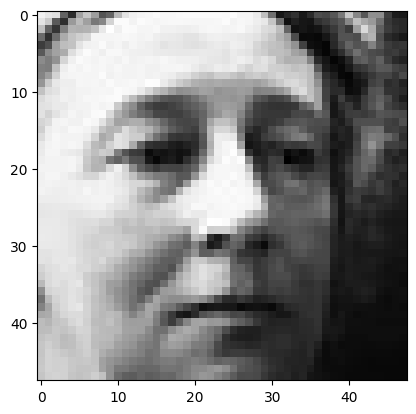

In [49]:
image = 'images/train/sad/Training_2913.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [50]:
import optree
import keras
print(optree.__version__)
print(keras.__version__)

0.15.0
3.9.2


In [ ]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')